# Part 1: General Concepts of GNNs

## Resume:

The first part of this course focuses on the foundational concepts of Graph Neural Networks (GNNs). It covers the essential theoretical framework behind GNNs, including the structure of graphs, the process of message passing, and the algorithms used for graph isomorphism. We will learn about the core principles that enable GNNs to operate on graph data, understanding key techniques such as the Weisfeiler-Lehman test and various approaches to addressing the graph isomorphism problem.

## Part 1: General Concepts of GNNs

### 1. Introduction to Graphs
- **Setup and Package Installation**
- **Definition and Components:** Nodes, edges, adjacency matrices.
- **Types of Graphs:** Directed vs. undirected, weighted vs. unweighted, cyclic vs. acyclic.
- **Applications of Graphs:** Social networks, molecular structures, knowledge graphs.

### 2. Message Passing in GNNs
- **Basic Concept:** How information is passed between nodes in a graph.
- **Message Function:** Types of messages, role in updating node representations.
- **Aggregation Function:** Techniques for combining messages, common aggregation methods (e.g., sum, mean, max).
- **Update Function:** How node states are updated based on aggregated messages.

### 3. Message-Passing Neural Networks (MPNN)
- **Architecture Overview:** Detailed look at how MPNNs operate.
- **Variants of MPNNs:** GCN, GAT, GraphSAGE, etc.
- **Training and Optimization:** Strategies for training GNNs, including loss functions and optimization techniques.

### 4. Graph Isomorphism and Weisfeiler-Lehman Test
- **Graph Isomorphism Problem:** Definition and significance in GNNs.
- **Weisfeiler-Lehman Test:** Explanation of the test, how it is used to distinguish non-isomorphic graphs.
- **Limitations and Extensions:** Discussing the limitations of the basic test and how GNNs attempt to overcome these.



### 5. Approaches to the Isomorphism Problem in GNNs
- **Expressive Power of GNNs:** Understanding the limits of GNNs in distinguishing different graphs.
- **Advanced Techniques:** Higher-order GNNs, relational pooling, and other advanced methods to address graph isomorphism.


## 1. Introduction to Graphs

Graphs are fundamental structures used to model relationships between objects. A graph consists of nodes (or vertices) and edges that connect pairs of nodes. Here's how to set up your environment to work with graphs in Python.

#### Installation of Necessary Packages

Before we begin, ensure you have the necessary packages installed:

In [ ]:
! pip install networkx matplotlib torch torch-geometric

### Definition and Components

A **graph** is a data structure that consists of two main components:
- **Nodes (or vertices):** These are the entities or objects in the graph. They are often denoted by circles or points.
- **Edges:** These represent the relationships or connections between the nodes. Edges can be directed (with a specific direction) or undirected (without direction), and can be weighted or unweighted.


**Python Code: Creating and Visualizing a Simple Graph**
Let's create a simple graph using the `networkx` library and visualize it using `matplotlib`.

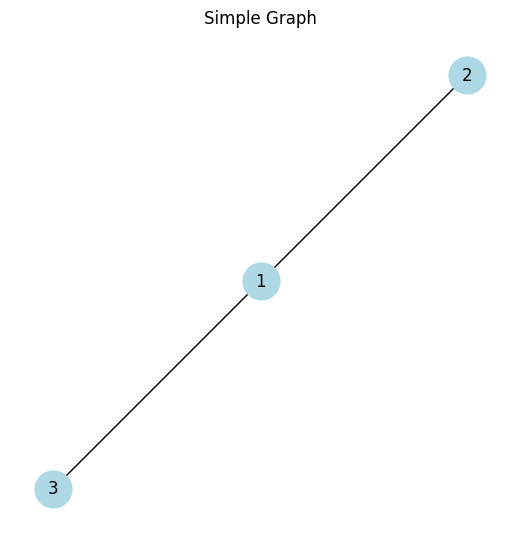

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)

# Draw the graph
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, node_size=700, node_color="lightblue")
plt.title("Simple Graph")
plt.show()


### Types of Graphs

   **Directed Graph (Digraph):** Each edge has a direction, pointing from one node to another.
   
   ![Directed Graph](https://upload.wikimedia.org/wikipedia/commons/2/23/Directed_graph_no_background.svg)

   

   Here's how to create and visualize a directed graph:



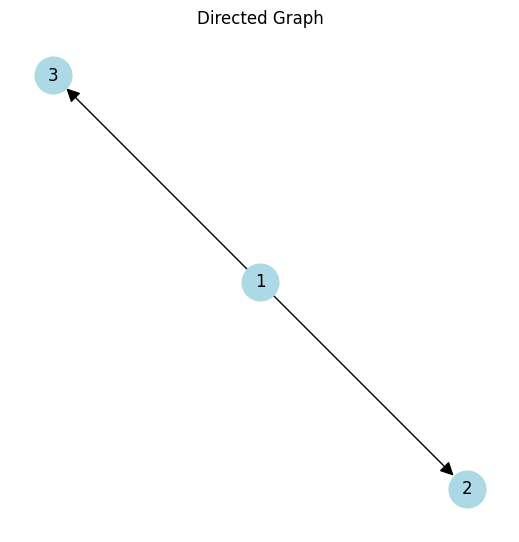

In [2]:
# Create a directed graph
D = nx.DiGraph()

# Add nodes and directed edges
D.add_edge(1, 2)
D.add_edge(1, 3)

# Draw the graph
plt.figure(figsize=(5,5))
nx.draw(D, with_labels=True, node_size=700, node_color="lightblue", arrowstyle="-|>", arrowsize=20)
plt.title("Directed Graph")
plt.show()


**Undirected Graph:** Edges do not have a direction; they simply connect two nodes.

   ![Undirected Graph](https://www.researchgate.net/profile/Stein-Malerud/publication/252675933/figure/fig1/AS:652972975476737@1532692297739/A-simple-undirected-graph-with-nodes-and-edges_W640.jpg)


   

**Weighted Graph:** Each edge has a numerical value(s) (weight(s)) associated with it, representing the strength or capacity of the connection.

   ![Weighted Graph](https://upload.wikimedia.org/wikipedia/commons/f/f0/Weighted_network.svg)


Here's how to create and visualize a weighted graph:

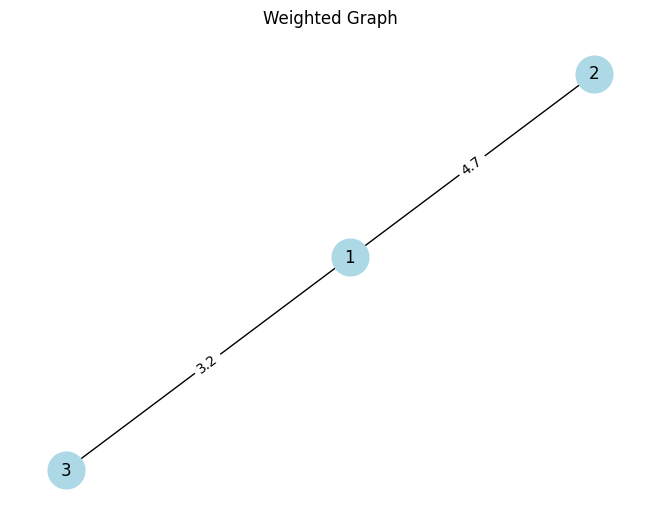

In [3]:
# Create a weighted graph
W = nx.Graph()

# Add weighted edges
W.add_edge(1, 2, weight=4.7)
W.add_edge(1, 3, weight=3.2)

# Draw the graph with edge labels
pos = nx.spring_layout(W)  # positions for all nodes
nx.draw(W, pos, with_labels=True, node_size=700, node_color="lightblue")
labels = nx.get_edge_attributes(W,'weight')
nx.draw_networkx_edge_labels(W, pos, edge_labels=labels)
plt.title("Weighted Graph")
plt.show()


### Adjacency Matrix Representation
Graphs can also be represented in matrix form using an adjacency matrix. The adjacency matrix of a graph is a square matrix where each element represents the presence (or absence) of an edge between two nodes.

Let's represent the graph we just visualized as an adjacency matrix.

In [4]:
import numpy as np

# Adjacency matrix representation of the graph
adj_matrix = np.array([
    [0, 1, 1, 0],  # Node 1 connections
    [1, 0, 1, 0],  # Node 2 connections
    [1, 1, 0, 1],  # Node 3 connections
    [0, 0, 1, 0]   # Node 4 connections
])

print("Adjacency Matrix:")
print(adj_matrix)

Adjacency Matrix:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


The output matrix corresponds to the graph we visualized, where `1` indicates the presence of an edge between nodes, and `0` indicates the absence of an edge.



## 2. Message Passing in GNNs

### 2.1 Basic Concept of Message Passing

In Graph Neural Networks (GNNs), **message passing** is a fundamental process where nodes in a graph communicate with their neighbors to update their own states or features. This process is applied iteratively, allowing nodes to aggregate information from their local neighborhood, which is crucial for tasks like node classification, graph classification, and link prediction.

### 2.2 Message Function

The **message function** defines how information (messages) is transmitted from one node to another. The message function typically depends on the features of the source node and the edge connecting it to the target node.

#### Example:
For a node $v$, the message from its neighbor $u$ can be represented as:
$$ m_{uv} = f(x_u, e_{uv}) $$
where:
- $x_u$ is the feature of node $u$
- $e_{uv}$ is the feature of the edge connecting nodes $u$ and $v$
- $f$ is a learnable function or a predefined function, such as a linear transformation or a neural network.

### 2.3 Aggregation Function

The **aggregation function** is responsible for combining all the incoming messages from the neighbors of a node. Common aggregation methods include summation, mean, and max pooling.

#### Example:
The aggregated message at node $v$ can be computed as:
$$ a_v = \text{AGG}(\{m_{uv} : u \in \mathcal{N}(v)\}) $$
where:
- $\mathcal{N}(v)$ is the set of neighbors of node $v$
- $\text{AGG}$ is the aggregation function (e.g., sum, mean, max)

### 2.4 Update Function

The **update function** takes the aggregated messages and updates the state or features of the node. This step typically involves a learnable transformation, such as a neural network layer.

#### Example:
The updated state of node $v$ can be represented as:
$$ x'_v = \text{UPDATE}(x_v, a_v) $$
where:
- $x_v$ is the original feature of node $v$
- $a_v$ is the aggregated message
- $\text{UPDATE}$ is a learnable function (e.g., a neural network layer) that combines the original node features with the aggregated information from its neighbors.

### 2.5 Illustration of Message Passing

Below is an illustration of the message passing process in a GNN. Each node in the graph receives messages from its neighbors, aggregates these messages, and updates its state.

![Message Passing in GNN](https://ignnition.org/doc/_images/message_passing.png)

In this illustration, nodes pass messages to their neighbors, which are then aggregated and used to update the node's own state. This process is repeated over multiple iterations, allowing each node to gather information from progressively more distant neighbors.


### 2.6 Implementing Message Passing in Python
Let’s implement a simple message passing step using Python and the networkx library.

In [ ]:
import networkx as nx
import numpy as np

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])

# Initialize node features (for simplicity, we use integers)
node_features = {1: 1, 2: 2, 3: 3, 4: 4}

# Message function: messages are simply the features of the neighbors
def message_function(u, v):
    return node_features[u]

# Aggregation function: sum of messages
def aggregation_function(neighbors):
    return sum(neighbors)

# Perform message passing for each node
new_node_features = {}
for node in G.nodes():
    # Get messages from neighbors
    messages = [message_function(neighbor, node) for neighbor in G.neighbors(node)]
    
    # Aggregate messages
    aggregated_message = aggregation_function(messages)
    
    # Update node feature (simple addition in this case)
    new_node_features[node] = node_features[node] + aggregated_message

print("Updated node features after message passing:")
print(new_node_features)


## 3. Graph Isomorphism and Weisfeiler-Lehman Test

### 3.1 Graph Isomorphism Problem

**Graph isomorphism** refers to the problem of determining whether two graphs are structurally identical. Two graphs are isomorphic if there exists a one-to-one correspondence between their nodes and edges such that adjacency is preserved.

#### Example:
- **Isomorphic Graphs:** Graphs with the same structure but potentially different node labels.
- **Non-Isomorphic Graphs:** Graphs with different structures.

### 3.2 Weisfeiler-Lehman Test

The **Weisfeiler-Lehman (WL) test** is a graph isomorphism test that iteratively refines node labels based on the labels of neighboring nodes. This process helps to distinguish non-isomorphic graphs by capturing the structure of the graph more effectively.

#### Algorithm:
1. **Initialization:** Assign a unique label to each node based on its degree (or another initial feature).
2. **Iteration:** At each step, update the label of each node based on the labels of its neighbors.
3. **Termination:** Repeat until labels stabilize or a predefined number of iterations is reached.

### 3.3 Illustration of Weisfeiler-Lehman Test

Here’s an illustration showing the process of the Weisfeiler-Lehman test on two example graphs.

![Weisfeiler-Lehman Test](https://miro.medium.com/v2/resize:fit:1400/0*SuYTb17bUhKzH-Ti)

In this illustration, the WL test refines the node labels in each iteration, allowing the algorithm to distinguish between graphs with different structures.

### 3.4 Implementing Weisfeiler-Lehman Test in Python

Let’s implement a basic version of the Weisfeiler-Lehman test using Python. We’ll use the `networkx` library for graph manipulation.



In [ ]:
import networkx as nx
from collections import defaultdict

def weisfeiler_lehman(graph, iterations=2):
    # Initialize node labels with their degrees
    node_labels = {node: str(degree) for node, degree in graph.degree()}
    
    for _ in range(iterations):
        new_labels = {}
        # Create a mapping from node label and its neighbors' labels to a new label
        label_map = defaultdict(lambda: defaultdict(int))
        for node in graph.nodes():
            neighbors_labels = [node_labels[neighbor] for neighbor in graph.neighbors(node)]
            combined_label = (node_labels[node], tuple(sorted(neighbors_labels)))
            new_label = hash(combined_label)  # Using hash as a simple unique new label
            new_labels[node] = new_label
        node_labels = new_labels
    
    return node_labels

# Create two example graphs
G1 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 1)])
G2 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5)])

# Apply Weisfeiler-Lehman test
labels_G1 = weisfeiler_lehman(G1)
labels_G2 = weisfeiler_lehman(G2)

print("Node labels for Graph G1:")
print(labels_G1)

print("Node labels for Graph G2:")
print(labels_G2)


### 3.5 Limitations and Extensions
The basic Weisfeiler-Lehman test has limitations, such as:
  * **Limited Expressiveness:** The test may fail to distinguish some non-isomorphic graphs, particularly those with complex or symmetric structures.
  
  * **Extensions:** To address these limitations, higher-order Weisfeiler-Lehman tests and other advanced techniques can be used to increase the discriminative power of the test.
  
**Higher-Order WL Test:**

An extension that refines the labels using higher-order neighborhoods, providing more discriminative power.

## 4. Message-Passing Neural Networks (MPNN)

### 4.1 Architecture Overview

**Message-Passing Neural Networks (MPNNs)** are a class of Graph Neural Networks (GNNs) that operate by iteratively exchanging information (messages) between nodes in a graph. The core idea is that each node updates its feature vector by aggregating messages from its neighbors, allowing the network to capture complex dependencies and patterns in the graph structure.

#### Key Components of MPNNs:

1. **Message Function:** Determines how information is passed from one node to another.
2. **Aggregation Function:** Combines incoming messages from neighboring nodes.
3. **Update Function:** Updates the node's state or feature based on the aggregated messages.

### 4.2 Variants of MPNNs

Several variants of MPNNs have been developed, each with unique characteristics and applications. Here are some of the most popular ones:

#### 4.2.1 Graph Convolutional Networks (GCNs)

**Graph Convolutional Networks (GCNs)** apply convolutional operations to graphs, allowing nodes to aggregate information from their neighbors based on the graph structure.

- **GCN Formula:**
  $$ H^{(l+1)} = \text{ReLU} \left( \hat{A} H^{(l)} W^{(l)} \right) $$
  where:
  - $\hat{A}$ is the normalized adjacency matrix.
  - $H^{(l)}$ is the node feature matrix at layer $l$.
  - $W^{(l)}$ is the weight matrix at layer $l$.

#### Example: GCN Layer in Python





In [ ]:
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn

class GCNLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNLayer, self).__init__()
        self.gcn_conv = pyg_nn.GCNConv(in_channels, out_channels)
    
    def forward(self, x, edge_index):
        return self.gcn_conv(x, edge_index)

# Example usage
gcn_layer = GCNLayer(in_channels=3, out_channels=2)
print(gcn_layer)


### Graph Attention Networks (GAT)

**Graph Attention Networks (GAT)** incorporate an attention mechanism that allows the model to weigh the importance of different neighbors differently. This helps the network focus on more relevant parts of the graph.

#### Key Features of GAT:
- **Attention Mechanism:** Assigns different weights to different neighbors based on their relevance.
- **Self-Attention:** Allows each node to attend to its neighbors with varying levels of importance.
- **Scalability:** Handles graphs of varying sizes and densities efficiently.
 
 * **GAT Formula:** The core operation in GAT involves calculating attention coefficients and aggregating information from neighbors. The formula for updating a node's representation in GAT can be expressed as:
 
$ H_i' = \text{LeakyReLU} \left( \sum_{j \in \mathcal{N}(i)} \alpha_{ij} W h_j \right) $ where:
* $H_i'$ is the updated feature vector for node $i$.
* $\alpha_{ij}$ is the attention coefficient between nodes $i$ and $j$.
* $W$ is the weight matrix.
* $\mathcal{N}(i)$ denotes the set of neighbors of node $i$.


#### Example: GAT Layer in Python

Here’s how you can implement a basic GAT layer using the `PyTorch Geometric` library:



In [ ]:
class GATLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GATLayer, self).__init__()
        self.gat_conv = pyg_nn.GATConv(in_channels, out_channels, heads=1)
    
    def forward(self, x, edge_index):
        return self.gat_conv(x, edge_index)

# Example usage
gat_layer = GATLayer(in_channels=3, out_channels=2)
print(gat_layer)



#### 4.2.3 **GraphSAGE**

**GraphSAGE** (Sample and Aggregation) is a variant of GNNs that samples a fixed-size neighborhood and aggregates information from these sampled neighbors. This approach scales well to large graphs and is particularly useful in inductive settings.
* **GraphSAGE Formula:** $ H'_i = \text{MLP} (\text{AGG} (\{H_j : j \in \mathcal{N}(i)\}))$ where:

    * $\text{AGG} $ can be mean, LSTM, or pooling aggregation functions.
    * $\text{MLP}$ is a multi-layer perceptron that combines the aggregated information.

**Example: GraphSAGE Layer in Python**

In [ ]:
class GraphSAGELayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GraphSAGELayer, self).__init__()
        self.sage_conv = pyg_nn.SAGEConv(in_channels, out_channels)
    
    def forward(self, x, edge_index):
        return self.sage_conv(x, edge_index)

# Example usage
sage_layer = GraphSAGELayer(in_channels=3, out_channels=2)
print(sage_layer)


### 4.3 Training and Optimization
Training MPNNs involves optimizing the parameters of the network to minimize a loss function, which measures the difference between the predicted outputs and the true labels. Common training strategies include:

#### 4.3.1 Loss Functions
* Cross-Entropy Loss: Commonly used for classification tasks, where the goal is to minimize the difference between the predicted class probabilities and the true class labels.

* Mean Squared Error (MSE): Used for regression tasks, where the goal is to minimize the difference between the predicted and actual continuous values.

**Example: Cross-Entropy Loss in Python**

In [ ]:
import torch.optim as optim

# Example of using Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gcn_layer.parameters(), lr=0.01)

# Example forward pass and loss calculation
output = gcn_layer(x, edge_index)
target = torch.tensor([0, 1, 0])  # Example target
loss = criterion(output, target)


#### 4.3.2 Optimization Techniques
* **Adam Optimizer:** A popular optimization algorithm that adapts the learning rate for each parameter, making it suitable for training deep neural networks.

* **Learning Rate Scheduling:** Adjusting the learning rate during training can help the model converge faster and avoid local minima.

## 5. Approaches to the Isomorphism Problem in GNNs

### 5.1 Expressive Power of GNNs

The **expressive power** of Graph Neural Networks (GNNs) refers to their ability to distinguish between different graph structures. While GNNs have shown great promise in learning from graph-structured data, they have inherent limitations when it comes to distinguishing non-isomorphic graphs—graphs that have the same structure but are labeled differently.

#### Key Points:
- **Graph Isomorphism:** Two graphs are isomorphic if there exists a one-to-one correspondence between their nodes and edges such that adjacency is preserved.
- **Expressive Limitations of GNNs:** Standard GNNs, such as those based on message passing, may fail to distinguish between certain non-isomorphic graphs. This limitation arises because the node embeddings may converge to similar representations, even if the underlying graph structures are different.

#### Example:
Consider two non-isomorphic graphs that have the same node degree distribution. A simple GNN might produce identical node embeddings for both graphs, failing to recognize that they are actually different.

### 5.2 Advanced Techniques to Address Graph Isomorphism

To overcome the limitations of standard GNNs in distinguishing non-isomorphic graphs, several advanced techniques and specialized architectures have been developed. These techniques enhance the expressive power of GNNs and provide better solutions to the graph isomorphism problem.

#### 5.2.1 Graph Isomorphism Network (GIN)

**Graph Isomorphism Network (GIN)** is a type of GNN designed to have a stronger expressive power, making it as powerful as the Weisfeiler-Lehman (WL) test in distinguishing non-isomorphic graphs.

- **Key Idea:** GIN uses an aggregation function that mimics the WL test, allowing it to distinguish graphs that other GNNs might not.
- **Architecture:** GINs typically use a sum aggregation function combined with a multi-layer perceptron (MLP) for node updates, which enhances their ability to capture graph structure.

#### GIN Formula:
$$ h_v^{(l+1)} = \text{MLP}^{(l)} \left( \left(1 + \epsilon^{(l)} \right) \cdot h_v^{(l)} + \sum_{u \in \mathcal{N}(v)} h_u^{(l)} \right) $$
where:
- $h_v^{(l)}$ is the feature of node $v$ at layer $l$.
- $\epsilon^{(l)}$ is a learnable parameter.
- $\text{MLP}^{(l)}$ is a multi-layer perceptron.


#### Example: GIN Layer in Python

In [ ]:
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn

class GINLayer(nn.Module):
    def __init__(self, in_channels, out_channels, eps=0.0):
        super(GINLayer, self).__init__()
        self.eps = eps
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, out_channels),
            nn.ReLU(),
            nn.Linear(out_channels, out_channels)
        )
    
    def forward(self, x, edge_index):
        row, col = edge_index
        aggr = torch.zeros_like(x)
        aggr.index_add_(0, col, x[row])
        return self.mlp((1 + self.eps) * x + aggr)

# Example usage
gin_layer = GINLayer(in_channels=3, out_channels=2)
print(gin_layer)

#### 5.2.2 Cell-Weisfeiler-Lehman Networks (CW Networks)

**Cell-Weisfeiler-Lehman Networks (CW Networks)** are an extension of the Weisfeiler-Lehman (WL) test designed to operate on cell complexes rather than just graphs. Introduced in the paper "Weisfeiler and Lehman Go Cellular," CW Networks generalize the WL framework to handle more complex structures, such as higher-dimensional cells (e.g., edges, faces, volumes).

##### Key Concepts:
- **Cell Complexes:** These are higher-dimensional generalizations of graphs. While graphs consist of nodes (0-cells) and edges (1-cells), cell complexes can include higher-dimensional cells like faces (2-cells) and volumes (3-cells).
- **Message Passing on Cells:** In CW Networks, message passing extends to higher-dimensional cells, allowing the network to aggregate information from more complex structures.

##### Applications:
- **Topological Data Analysis:** CW Networks are particularly useful in fields like topological data analysis, where data is often represented as cell complexes.
- **Computational Biology:** These networks can model complex biological structures more effectively than traditional GNNs.

### Implementing a Basic CW Network in Python

Below is a simplified implementation of a CW Network-like structure using Python. This example demonstrates how one might extend message passing to higher-dimensional cells.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

class CWLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CWLayer, self).__init__()
        self.fc0 = nn.Linear(in_channels, out_channels)  # For 0-cells (nodes)
        self.fc1 = nn.Linear(in_channels, out_channels)  # For 1-cells (edges)
        self.fc2 = nn.Linear(in_channels, out_channels)  # For 2-cells (faces)

    def forward(self, node_features, edge_features, face_features, edge_index):
        # Update 0-cells (nodes)
        row, col = edge_index
        node_aggr = torch.zeros_like(node_features)
        node_aggr.index_add_(0, col, edge_features)
        node_features = F.relu(self.fc0(node_features + node_aggr))
        
        # Update 1-cells (edges)
        edge_aggr = torch.zeros_like(edge_features)
        edge_aggr.index_add_(0, row, face_features)
        edge_features = F.relu(self.fc1(edge_features + edge_aggr))
        
        # Update 2-cells (faces)
        face_aggr = torch.zeros_like(face_features)
        face_aggr = face_aggr + edge_features[row] + edge_features[col]  # Simplified aggregation
        face_features = F.relu(self.fc2(face_features + face_aggr))
        
        return node_features, edge_features, face_features

# Example usage
cw_layer = CWLayer(in_channels=3, out_channels=2)

# Create a simple graph with face information (2-cells)
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])
node_features = torch.randn((3, 3))  # 3 nodes, 3 features per node
edge_features = torch.randn((3, 3))  # 3 edges, 3 features per edge
face_features = torch.randn((1, 3))  # 1 face, 3 features per face

# Edge index (for updating node and edge features)
edge_index = torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)

# Apply the CW Layer
node_features, edge_features, face_features = cw_layer(node_features, edge_features, face_features, edge_index)

print("Updated Node Features:")
print(node_features)

print("Updated Edge Features:")
print(edge_features)

print("Updated Face Features:")
print(face_features)

#### Explanation of the Code:

* **Node, Edge, and Face Features:** The code defines feature tensors for nodes (0-cells), edges (1-cells), and faces (2-cells).

* **Message Passing:** The CWLayer class updates the features of nodes, edges, and faces using message passing that aggregates information from neighboring cells.

* **Edge Index:** This tensor defines the connections between nodes, which are used to aggregate messages.
This implementation is a simplified version of a CW Network and demonstrates the extension of message passing to higher-dimensional cells.